In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
data=df=pd.read_csv('/content/drive/MyDrive/Data/final_df_2.csv')

In [ ]:
data_1=data

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Frequency                     128655 non-null  object 
 1   InstlmentMode                 128655 non-null  object 
 2   LoanStatus                    128655 non-null  object 
 3   PaymentMode                   128655 non-null  object 
 4   Tenure                        128655 non-null  int64  
 5   AssetCost                     128655 non-null  int64  
 6   AmountFinance                 128655 non-null  float64
 7   DisbursalAmount               128655 non-null  float64
 8   EMI                           128655 non-null  float64
 9   LTV                           128655 non-null  float64
 10  SEX                           128596 non-null  object 
 11  AGE                           128596 non-null  float64
 12  MonthlyIncome                 128421 non-nul

In [ ]:
data_1['P_ownership'] = data_1['P_ownership'].astype(str)
data_1['P_assetclass'] = data_1['P_assetclass'].astype(str)   #it has some nan values
data_1['P_account_status'] = data_1['P_account_status'].astype(str)

In [ ]:
data_1['P_assetclass'].value_counts()

nan    65134
2.0    60571
1.0     1504
0.0     1446
Name: P_assetclass, dtype: int64

In [ ]:
data_1['P_assetclass'].isna().sum()

0

In [ ]:
data_1['P_assetclass'].replace('nan',np.NaN,inplace=True)

In [ ]:
data_1['P_assetclass'].isna().sum()

65134

In [ ]:
data_1['P_account_status'].value_counts()

2.0    82685
1.0    40007
0.0     5962
nan        1
Name: P_account_status, dtype: int64

In [ ]:
data_1['P_account_status'].replace('nan',np.NaN,inplace=True)

In [ ]:
data_1.drop(["Top-up Month"], axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data_1.drop("Top-up Month-Binary", axis=1)  # Features
y = data_1["Top-up Month-Binary"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
## As the data is skewed and not normally distributed we will apply median imputation
numerical_columns = data_1.select_dtypes(include=['int', 'float']).columns
categorical_columns = data_1.select_dtypes(include=['object', 'category']).drop("Top-up Month-Binary", axis=1).columns

# Create the column transformer with separate imputers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), numerical_columns),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorical_columns),
    ])

# Fit and transform the training data
X_train_imputed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted transformer
X_test_imputed = preprocessor.transform(X_test)

In [ ]:
categorical_columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'P_assetclass', 'P_account_status', 'P_installment_frequency',
       'P_ownership'],
      dtype='object')

In [ ]:
concatenated_index = numerical_columns.append(categorical_columns)
concatenated_index

Index(['Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV',
       'AGE', 'MonthlyIncome', 'P_total_disbursed_amount',
       'P_total_writeoffamt', 'P_totalamtpaid', 'P_avg_current_bal_difference',
       'P_overdue_time_ratio', 'P_total_positive', 'P_total_negative',
       'self_indicator_ratio', 'P_paymentdone_ratio', 'P_avg_days_loan',
       'P_max_overdue', 'P_avg_overdue', 'Frequency', 'InstlmentMode',
       'LoanStatus', 'PaymentMode', 'SEX', 'P_assetclass', 'P_account_status',
       'P_installment_frequency', 'P_ownership'],
      dtype='object')

In [ ]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=concatenated_index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns= concatenated_index)

In [ ]:
X_train_imputed[numerical_columns] = X_train_imputed[numerical_columns].astype(float)
X_test_imputed[numerical_columns] = X_test_imputed[numerical_columns].astype(float)

In [ ]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102924 entries, 0 to 102923
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Tenure                        102924 non-null  float64
 1   AssetCost                     102924 non-null  float64
 2   AmountFinance                 102924 non-null  float64
 3   DisbursalAmount               102924 non-null  float64
 4   EMI                           102924 non-null  float64
 5   LTV                           102924 non-null  float64
 6   AGE                           102924 non-null  float64
 7   MonthlyIncome                 102924 non-null  float64
 8   P_total_disbursed_amount      102924 non-null  float64
 9   P_total_writeoffamt           102924 non-null  float64
 10  P_totalamtpaid                102924 non-null  float64
 11  P_avg_current_bal_difference  102924 non-null  float64
 12  P_overdue_time_ratio          102924 non-nul

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Assuming you have a DataFrame called 'data' with columns to be encoded
# 'one_hot_cols' contains the column names for one-hot encoding
# 'ordinal_cols' contains the column names for ordinal encoding
one_hot_cols = ["InstlmentMode","LoanStatus","PaymentMode","SEX"]
ordinal_cols = ["Frequency"]

# Define the transformers for one-hot encoding and ordinal encoding
one_hot_transformer = OneHotEncoder(drop='first')
ordinal_transformer = OrdinalEncoder(categories=[['BI-Monthly', 'Monthly', 'Half Yearly','Quatrly']])

# Create the ColumnTransformer with separate transformers for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot_transformer, one_hot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols)
    ],remainder='passthrough')

# Apply the ColumnTransformer on the data
transformed_train_data = preprocessor.fit_transform(X_train_imputed)
transformed_test_data = preprocessor.transform(X_test_imputed)


In [ ]:
# Get the column names for one-hot encoded columns
one_hot_column_names = preprocessor.transformers_[0][1].get_feature_names_out(one_hot_cols)
# Get the column names for ordinal encoded columns
ordinal_column_names = ordinal_cols
# Remainder column name
remain = ['Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV',
       'AGE', 'MonthlyIncome', 'P_total_disbursed_amount',
       'P_total_writeoffamt', 'P_totalamtpaid', 'P_avg_current_bal_difference',
       'P_overdue_time_ratio', 'P_total_positive', 'P_total_negative',
       'self_indicator_ratio', 'P_paymentdone_ratio', 'P_avg_days_loan',
       'P_max_overdue', 'P_avg_overdue','P_assetclass', 'P_account_status',
       'P_installment_frequency', 'P_ownership']

# Concatenate the column names
transformed_column_names = np.concatenate((one_hot_column_names, ordinal_column_names,remain))

# Convert the transformed data to DataFrames with column names
transformed_train_df = pd.DataFrame(transformed_train_data, columns=transformed_column_names)
transformed_test_df = pd.DataFrame(transformed_test_data, columns=transformed_column_names)

In [ ]:
transformed_train_df.drop(["P_installment_frequency"],axis = 1,inplace = True)
transformed_train_df=transformed_train_df.astype(float)

In [ ]:
transformed_test_df.drop(["P_installment_frequency"],axis = 1,inplace = True)
transformed_test_df = transformed_test_df.astype(float)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create the column transformer with separate transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', MinMaxScaler(), numerical_columns)
    ], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(transformed_train_df)

# Transform the test data using the fitted transformer
X_test_scaled = preprocessor.transform(transformed_test_df)

In [ ]:
transformed_train_df

,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,...,P_total_positive,P_total_negative,self_indicator_ratio,P_paymentdone_ratio,P_avg_days_loan,P_max_overdue,P_avg_overdue,P_assetclass,P_account_status,P_ownership
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,1.000000,0.000000,736.000000,0.0,0.000000,2.0,2.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,7.0,0.333333,0.018519,369.000000,0.0,0.000000,2.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,28.0,0.0,1.000000,0.000000,1080.000000,44700.0,200076.000000,2.0,2.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.0,0.0,0.333333,0.000000,72.500000,42700.0,28466.666667,2.0,2.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,0.0,1.000000,0.000000,397.000000,28300.0,31600.000000,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102919,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,3.0,0.666667,0.000000,1170.000000,79950.0,188925.333333,2.0,2.0,1.0
102920,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,22.0,0.0,1.000000,0.000000,891.529412,37000.0,203715.312500,2.0,1.0,1.0
102921,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.5,0.0,0.083333,0.034722,854.636364,1312.0,820.083333,2.0,2.0,1.0
102922,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,1.000000,0.000000,891.529412,15100.0,15100.000000,2.0,0.0,1.0


In [ ]:
transformed_column_names=preprocessor.get_feature_names_out()
transformed_column_names=[name.replace('num_scaler__', '').replace('remainder__','') for name in transformed_column_names]

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=transformed_column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=transformed_column_names)

In [ ]:
X_train_scaled[numerical_columns] = X_train_scaled[numerical_columns].astype(float)
X_test_scaled[numerical_columns] = X_test_scaled[numerical_columns].astype(float)

<Figure size 1000x600 with 0 Axes>

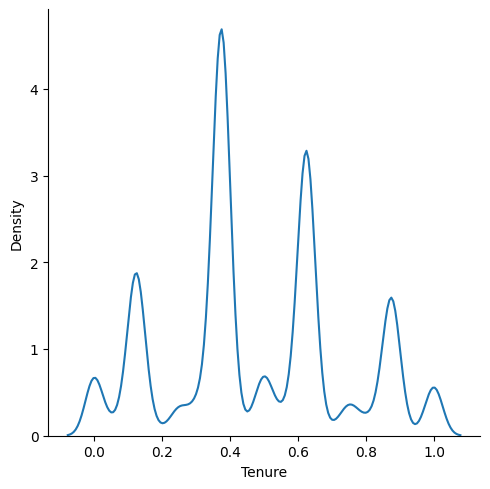

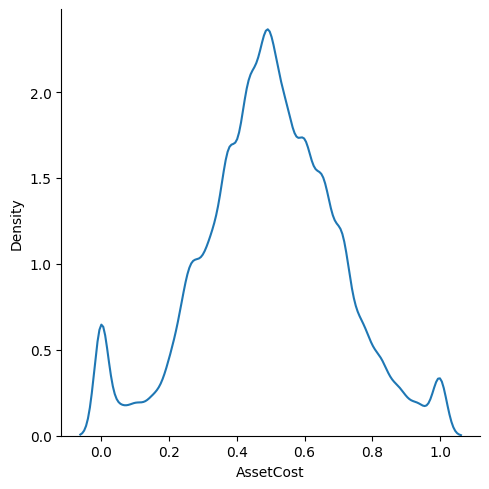

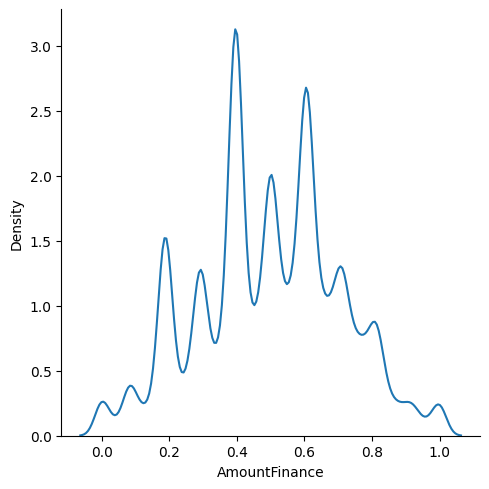

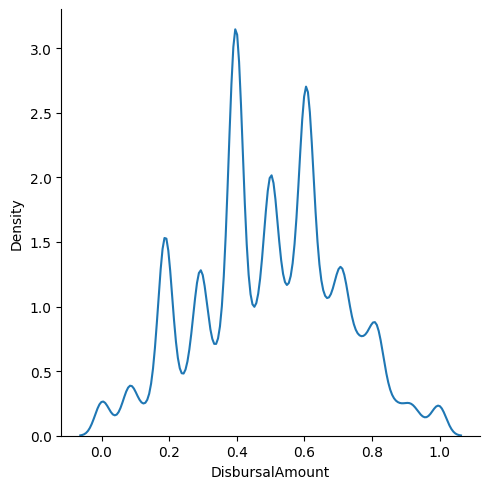

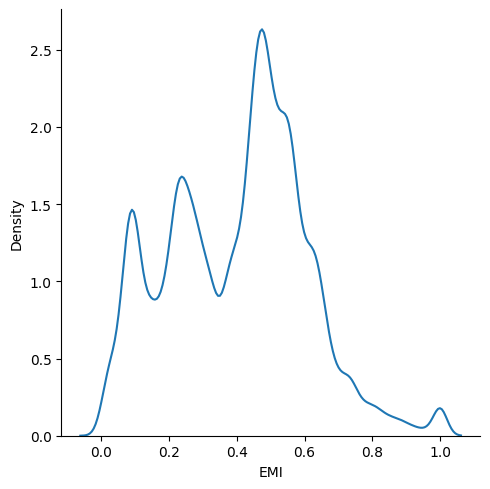

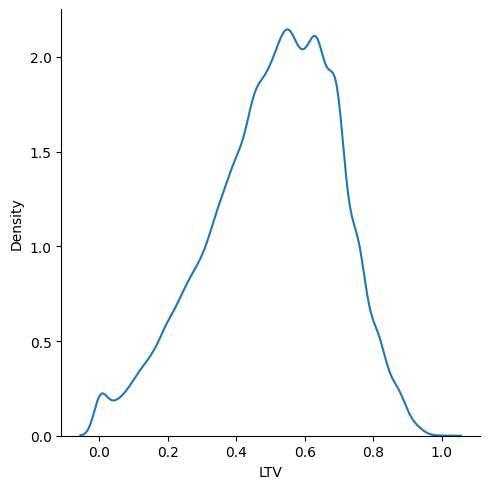

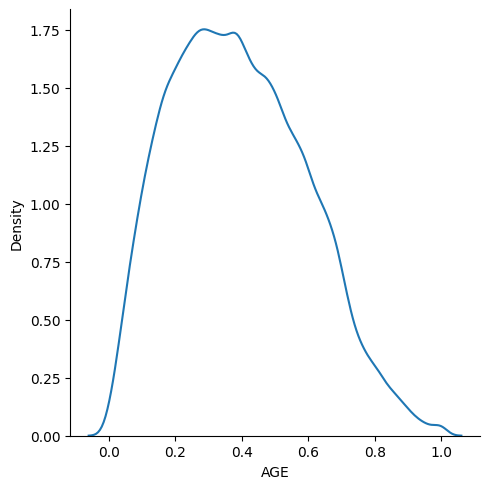

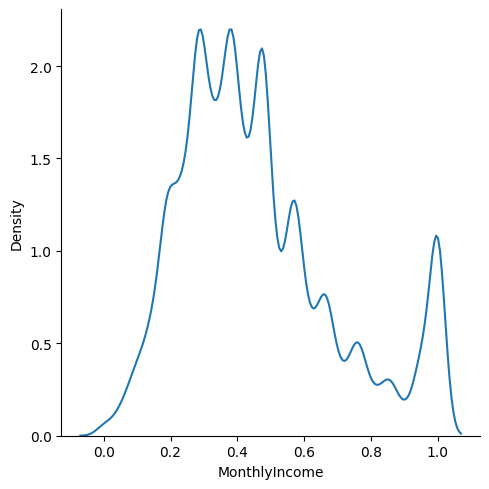

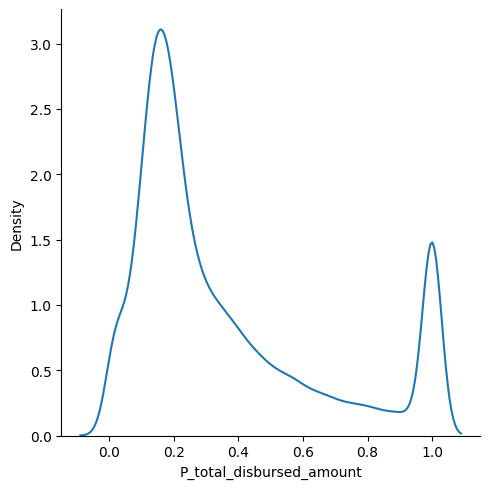

<ipython-input-31-f945ea016073>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(X_train_scaled[i],kind="kde")


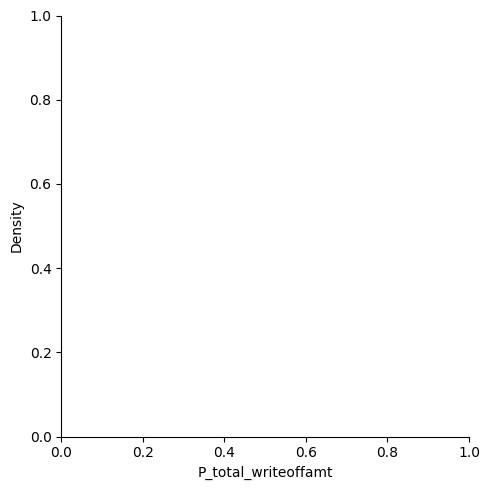

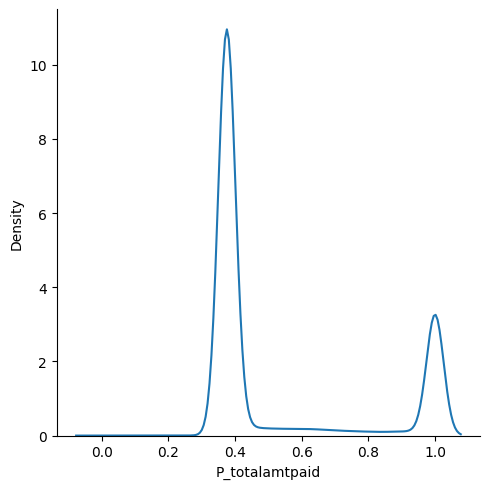

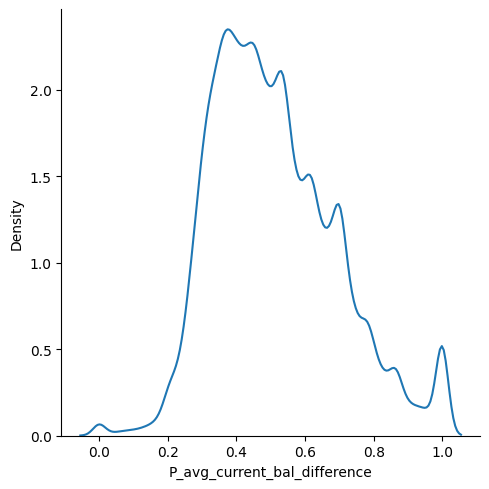

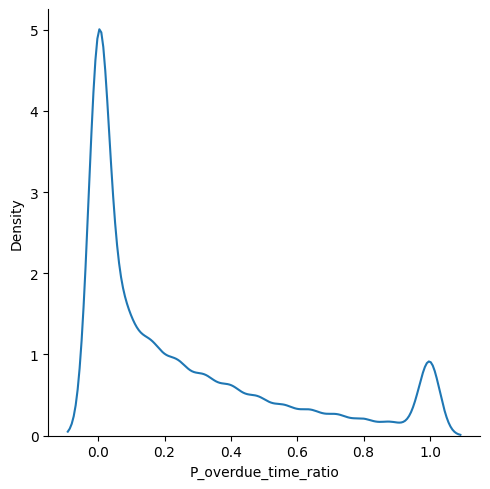

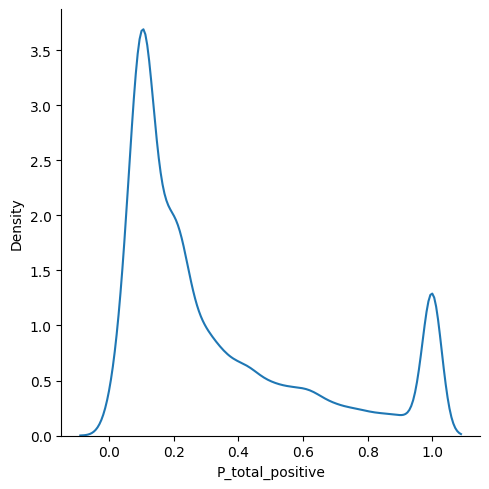

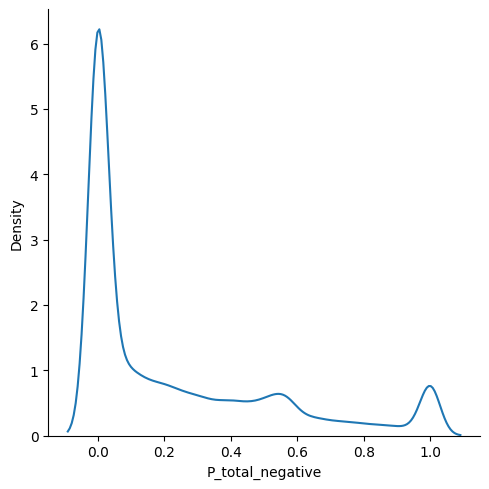

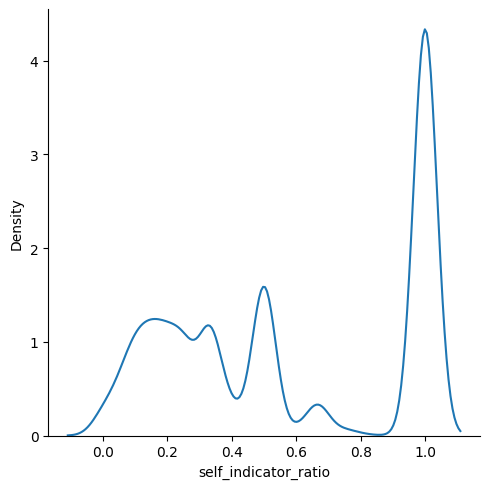

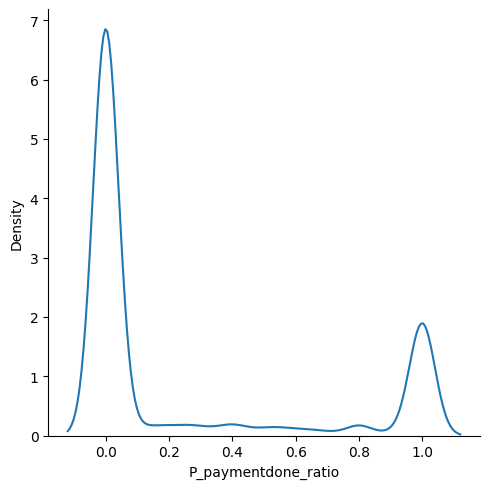

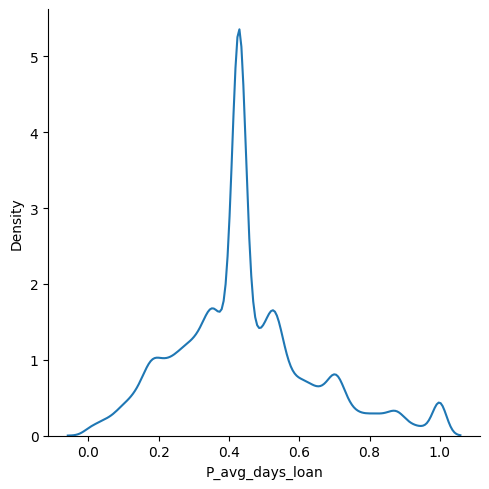

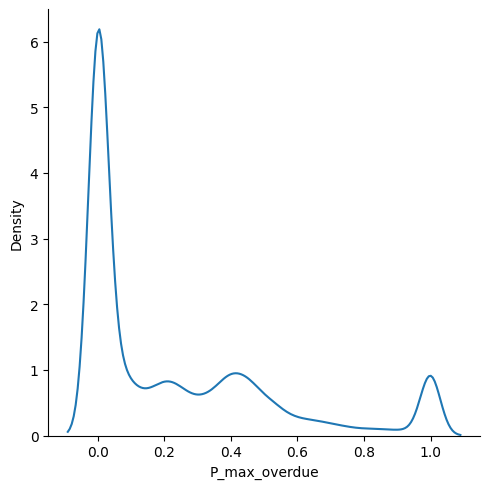

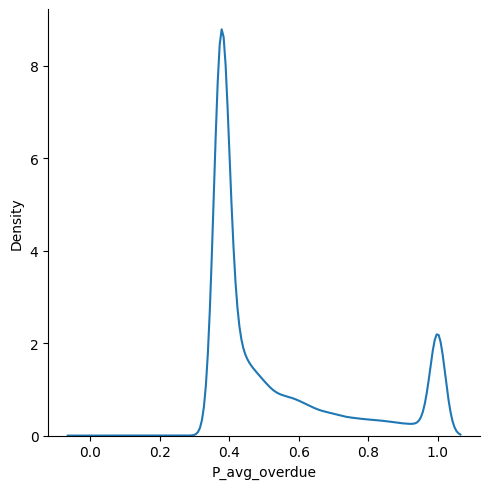

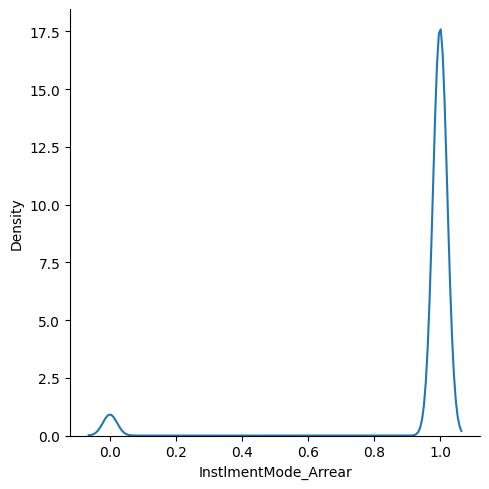

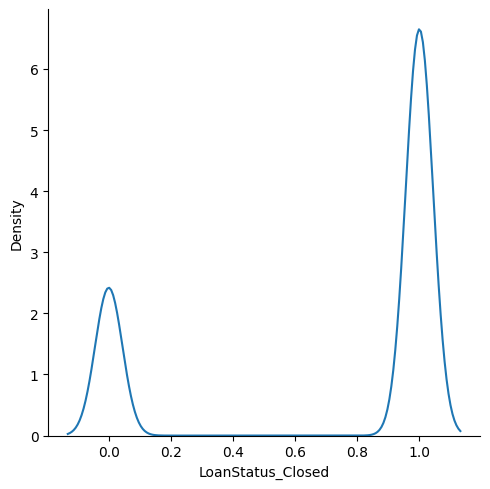

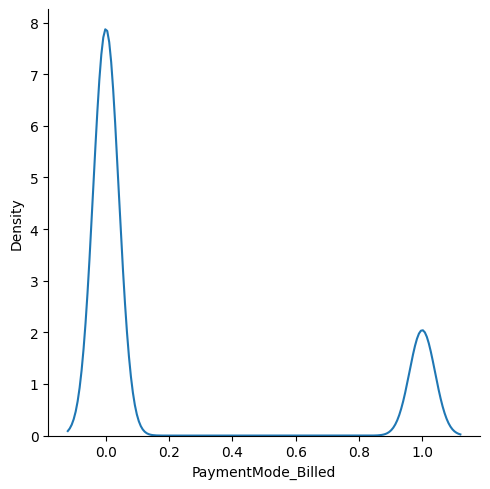

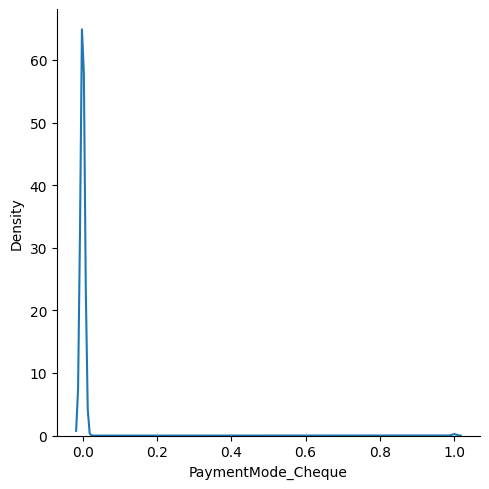

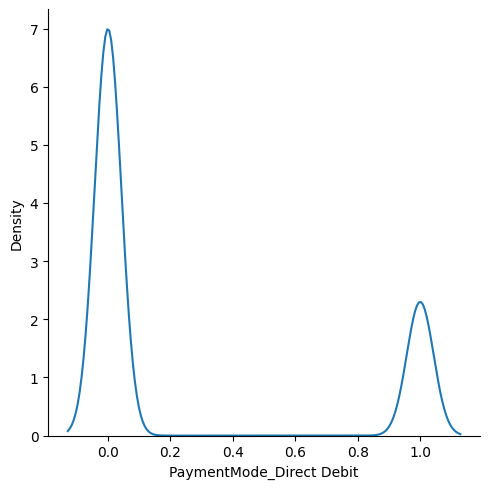

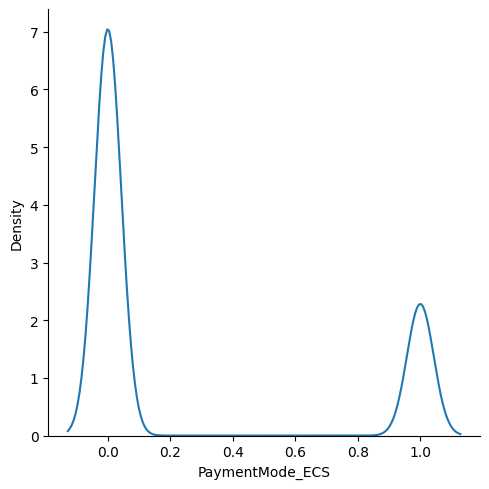

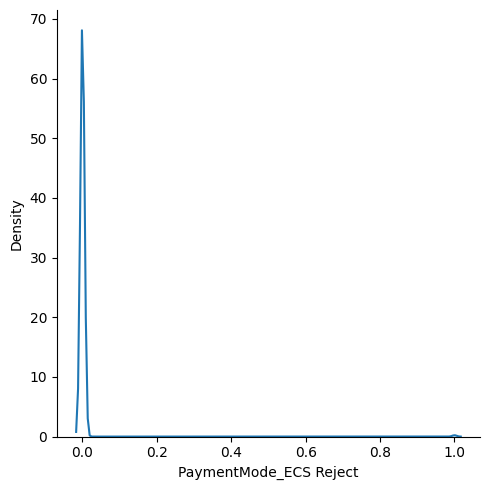

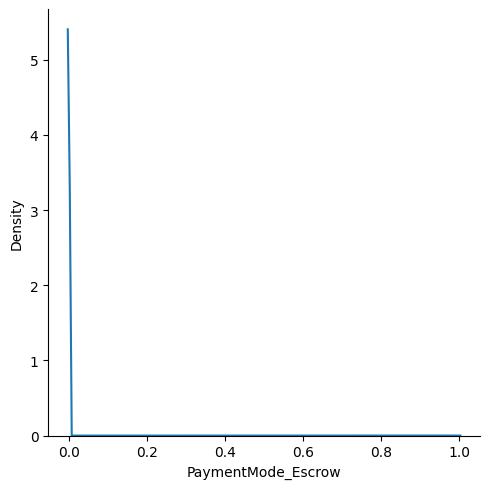

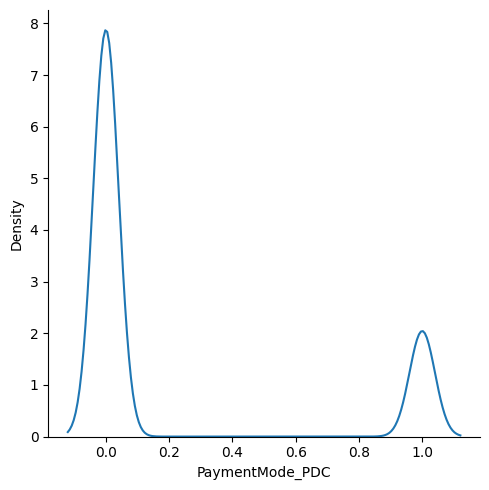

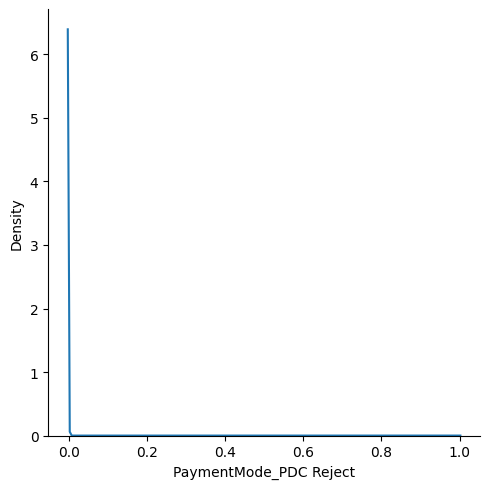

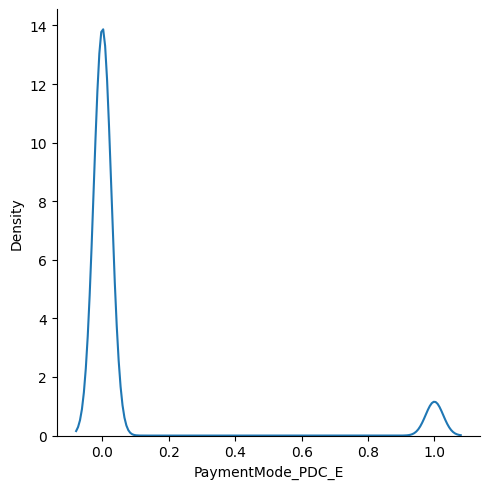

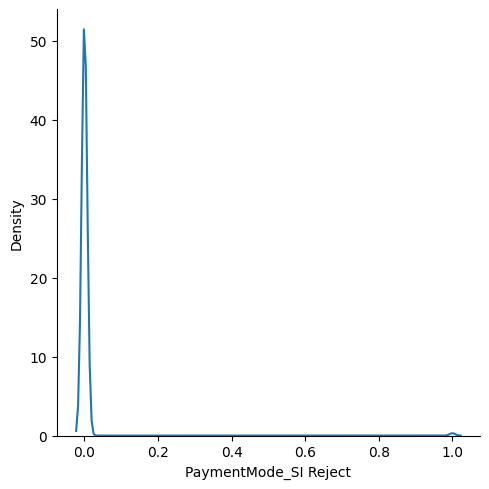

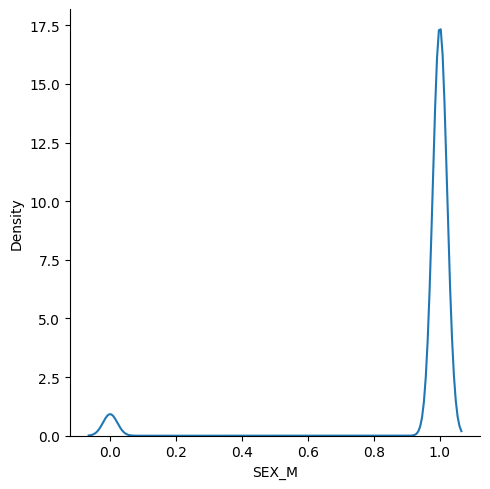

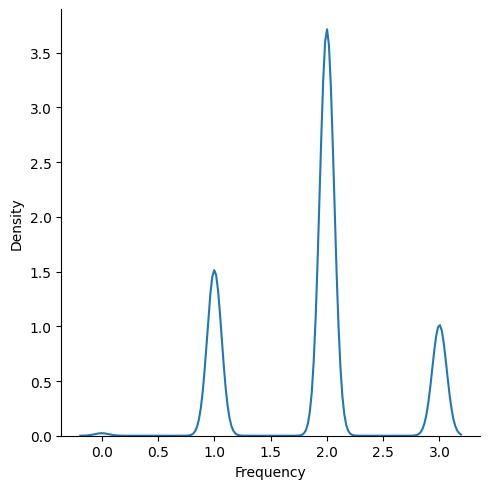

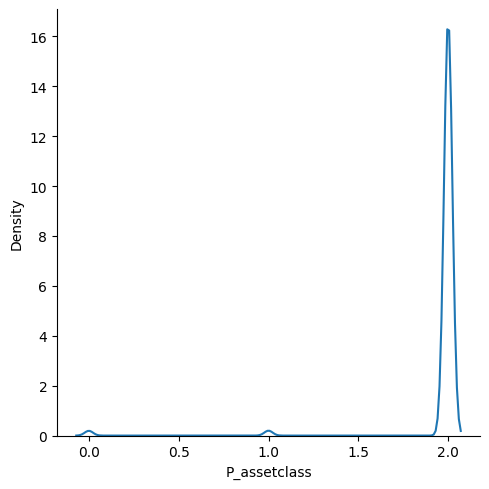

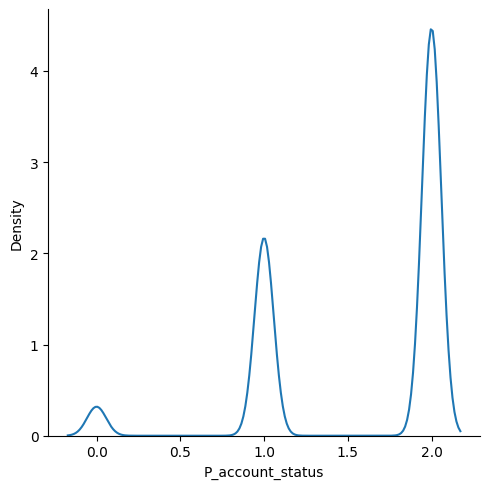

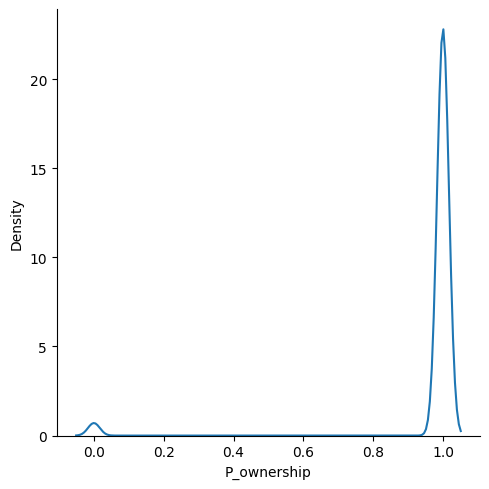

In [ ]:
## Now we see the change in scale in graphs
plt.figure(figsize=(10,6))
for i in X_train_scaled.select_dtypes(include=['int', 'float']).columns:
    sns.displot(X_train_scaled[i],kind="kde")
    plt.show()

In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102924 entries, 0 to 102923
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Tenure                        102924 non-null  float64
 1   AssetCost                     102924 non-null  float64
 2   AmountFinance                 102924 non-null  float64
 3   DisbursalAmount               102924 non-null  float64
 4   EMI                           102924 non-null  float64
 5   LTV                           102924 non-null  float64
 6   AGE                           102924 non-null  float64
 7   MonthlyIncome                 102924 non-null  float64
 8   P_total_disbursed_amount      102924 non-null  float64
 9   P_total_writeoffamt           102924 non-null  float64
 10  P_totalamtpaid                102924 non-null  float64
 11  P_avg_current_bal_difference  102924 non-null  float64
 12  P_overdue_time_ratio          102924 non-nul

In [ ]:
X_train_scaled["P_assetclass"]

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
102919    2.0
102920    2.0
102921    2.0
102922    2.0
102923    2.0
Name: P_assetclass, Length: 102924, dtype: float64

In [ ]:
X_train_scaled.isna().sum()

Tenure                          0
AssetCost                       0
AmountFinance                   0
DisbursalAmount                 0
EMI                             0
LTV                             0
AGE                             0
MonthlyIncome                   0
P_total_disbursed_amount        0
P_total_writeoffamt             0
P_totalamtpaid                  0
P_avg_current_bal_difference    0
P_overdue_time_ratio            0
P_total_positive                0
P_total_negative                0
self_indicator_ratio            0
P_paymentdone_ratio             0
P_avg_days_loan                 0
P_max_overdue                   0
P_avg_overdue                   0
InstlmentMode_Arrear            0
LoanStatus_Closed               0
PaymentMode_Billed              0
PaymentMode_Cheque              0
PaymentMode_Direct Debit        0
PaymentMode_ECS                 0
PaymentMode_ECS Reject          0
PaymentMode_Escrow              0
PaymentMode_PDC                 0
PaymentMode_PD

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

No Top-up Service       0.85      0.97      0.91     21463
   Top-up-Service       0.54      0.15      0.23      4268

         accuracy                           0.84     25731
        macro avg       0.69      0.56      0.57     25731
     weighted avg       0.80      0.84      0.80     25731



In [ ]:
#SMOTE+Logistic Regression
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
logreg = LogisticRegression(solver='lbfgs',C=0.1)
logreg.fit(X_balanced, y_balanced)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

No Top-up Service       0.93      0.70      0.80     21463
   Top-up-Service       0.32      0.72      0.45      4268

         accuracy                           0.70     25731
        macro avg       0.62      0.71      0.62     25731
     weighted avg       0.83      0.70      0.74     25731



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.857525941471377
Classification Report:
                    precision    recall  f1-score   support

No Top-up Service       0.86      0.98      0.92     21463
   Top-up-Service       0.73      0.23      0.34      4268

         accuracy                           0.86     25731
        macro avg       0.80      0.60      0.63     25731
     weighted avg       0.84      0.86      0.82     25731

Confusion Matrix:
 [[21101   362]
 [ 3304   964]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Fit the classifier on your training data
rf_classifier.fit(transformed_train_df, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8555050328397653
Classification Report:
                    precision    recall  f1-score   support

No Top-up Service       0.86      0.99      0.92     21463
   Top-up-Service       0.73      0.20      0.32      4268

         accuracy                           0.86     25731
        macro avg       0.80      0.59      0.62     25731
     weighted avg       0.84      0.86      0.82     25731

Confusion Matrix:
 [[21144   319]
 [ 3399   869]]


##Oversampling

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class Distribution Before Oversampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomOverSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Oversampling:", Counter(y_train_resampled))

Class Distribution Before Oversampling: Counter({'No Top-up Service': 85214, 'Top-up-Service': 17710})
Class Distribution After Oversampling: Counter({'No Top-up Service': 85214, 'Top-up-Service': 85214})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier on your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8588084411798997
Classification Report:
                    precision    recall  f1-score   support

No Top-up Service       0.88      0.96      0.92     21463
   Top-up-Service       0.64      0.34      0.45      4268

         accuracy                           0.86     25731
        macro avg       0.76      0.65      0.68     25731
     weighted avg       0.84      0.86      0.84     25731

Confusion Matrix:
 [[20641   822]
 [ 2811  1457]]


## Under sampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print("Class Distribution Before Undersampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Undersampling:", Counter(y_train_resampled))

Class Distribution Before Undersampling: Counter({'No Top-up Service': 85214, 'Top-up-Service': 17710})
Class Distribution After Undersampling: Counter({'No Top-up Service': 17710, 'Top-up-Service': 17710})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier on your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = rf_classifier.predict(transformed_test_df)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7224748358011737
Classification Report:
                    precision    recall  f1-score   support

No Top-up Service       0.94      0.71      0.81     21463
   Top-up-Service       0.35      0.78      0.48      4268

         accuracy                           0.72     25731
        macro avg       0.64      0.74      0.65     25731
     weighted avg       0.84      0.72      0.76     25731

Confusion Matrix:
 [[15282  6181]
 [  960  3308]]


#Multi class


In [ ]:
#XGBOOST without balacing
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the LightGBM classifier with class weights
xgb_classifier = xgb.XGBClassifier(n_estimators=100)

# Fit the classifier on your training data
xgb_classifier.fit(transformed_train_df, y_train_encoded)

# Make predictions on new data
y_pred = xgb_classifier.predict(transformed_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8595079864754576
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     21463
           1       0.66      0.32      0.43      4268

    accuracy                           0.86     25731
   macro avg       0.77      0.64      0.67     25731
weighted avg       0.84      0.86      0.84     25731

Confusion Matrix:
 [[20756   707]
 [ 2908  1360]]


In [ ]:
#XGBOOST with balancing
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the LightGBM classifier with class weights
xgb_classifier = xgb.XGBClassifier(n_estimators=100, scale_pos_weight=sum(y_train_encoded == 0) / sum(y_train_encoded == 1))

# Fit the classifier on your training data
xgb_classifier.fit(transformed_train_df, y_train_encoded)

# Make predictions on new data
y_pred = xgb_classifier.predict(transformed_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7630095993160002
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84     21463
           1       0.38      0.71      0.50      4268

    accuracy                           0.76     25731
   macro avg       0.66      0.74      0.67     25731
weighted avg       0.84      0.76      0.79     25731

Confusion Matrix:
 [[16600  4863]
 [ 1235  3033]]


In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class Distribution Before Oversampling:", Counter(y_train))

# Create the RandomUnderSampler object
undersampler = RandomOverSampler(random_state=42)

# Apply the undersampler on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(transformed_train_df, y_train)

# Display the class distribution after undersampling
print("Class Distribution After Oversampling:", Counter(y_train_resampled))

Class Distribution Before Oversampling: Counter({'No Top-up Service': 85214, 'Top-up-Service': 17710})
Class Distribution After Oversampling: Counter({'No Top-up Service': 85214, 'Top-up-Service': 85214})


In [ ]:
#Oversampling+XGBOOST
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Create the LightGBM classifier with class weights
xgb_classifier = xgb.XGBClassifier(n_estimators=100)

# Fit the classifier on your training data
xgb_classifier.fit(X_train_resampled, y_train_encoded)

# Make predictions on new data
y_pred = xgb_classifier.predict(transformed_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7645641444172399
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     21463
           1       0.38      0.70      0.50      4268

    accuracy                           0.76     25731
   macro avg       0.66      0.74      0.67     25731
weighted avg       0.84      0.76      0.79     25731

Confusion Matrix:
 [[16680  4783]
 [ 1275  2993]]


In [ ]:
#LightGBM+Oversampling:

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the LightGBM classifier with class weights
lgb_classifier = lgb.LGBMClassifier(n_estimators=100)

# Fit the classifier on your training data
lgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on new data
y_pred = lgb_classifier.predict(transformed_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate and print confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 85214, number of negative: 85214
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 170428, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7397691500524659
Classification Report:
                    precision    recall  f1-score   support

No Top-up Service       0.94      0.74      0.83     21463
   Top-up-Service       0.36      0.76      0.49      4268

         accuracy                           0.74     25731
        macro avg       0.65      0.75      0.66     25731
     weighted avg       0.84      0.74      0.77     25731

Con